In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('Files/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Preparing the Data

In [3]:
### Preparing the data - Part 1

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes) 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

### Preparing the data - Part 2

# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 
# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

# Clustered Bar Chart

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart.

![](Images/Clusterd_bar_chart.png)

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of **labels on two variables**.

So we want to organize the bars into an order that makes the plot easy to interpret.

---
In the last lesson, you saw how to use Seaborn's count plot function to generate a bar chart of one variable.

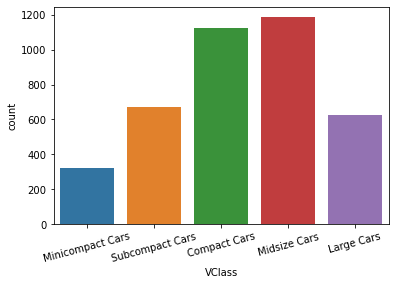

In [11]:
sb.countplot(data = fuel_econ, x = 'VClass');
plt.xticks(rotation=15);

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster.

This is easiest to see with an example, using seaborn's countplot function.\
To take the plot from univariate to bivariate, we add the second variable to be plotted under the `"hue"` argument.

In other words, to divide each of the individual bars into multiple bars for the different transmission types, we just need to add a `hue` parameter pointing to the **trans_type variable**.

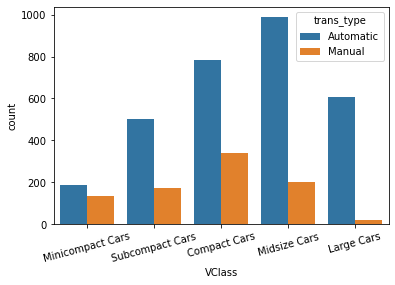

In [12]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation=15);

With the cluster bar chart, we can see clearly that:
- mini compact cars have the closest ratio between automatic and manual transmissions,
- while large cars had the most distant ratio.

# Alternative Approach - Heat Maps

One alternative way of depicting the relationship between two categorical variables is through a heat map.\
Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart.

**Important Note:** The seaborn function `heatmap()` is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course.\
**$\color{red}{\text{Instead of providing the original dataframe}}$**, we need to **$\color{green}{\text{summarize the counts into a matrix}}$** that will then be plotted.

In [23]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size() 
# If you used "sum", this will sum the the actual values in the dataframe variables(columns),
# we only need the "count" of entries, which we get by using the `size` function.

ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [24]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [25]:
# Remember Melt function? here another sister, the pivot function.

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

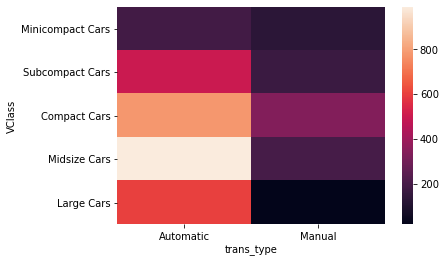

In [26]:
sb.heatmap(ct_counts)

The heat map tells the same story as the clustered bar chart.

<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

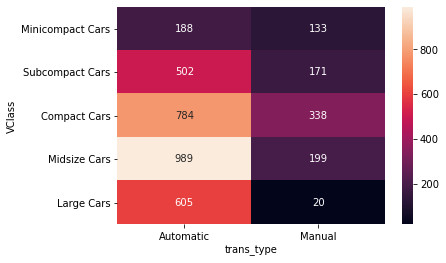

In [27]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

`annot = True` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision.

Adding `fmt = 'd'` means that annotations will all be formatted as integers instead.\
You can use `fmt = '.0f'` if you have any cells with no counts, in order to account for `NaN`s.